#### My Netflix Data

In [1]:
# Loading viewing activity csv
import pandas as pd
df = pd.read_csv('ViewingActivity.csv')

In [2]:
# view rows and columns
df.shape

(440, 10)

In [3]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kgabo,2023-01-08 19:04:16,00:01:47,NaN,Norbit,NaN,Netflix Windows App - Cadmium Windows Mobile,00:01:47,00:01:47,ZA (South Africa)
1,Kgabo,2023-01-08 18:57:03,00:00:05,Autoplayed: user action: None;,Season 1 Genre Specific Moment Clip: Wednesday,HOOK,Netflix Windows App - Cadmium Windows Mobile,00:00:05,00:00:05,ZA (South Africa)
2,Kgabo,2023-01-08 18:48:13,00:00:07,Autoplayed: user action: None;,Season 2 Genre Specific Moment Clip: Ginny & G...,HOOK,Netflix Windows App - Cadmium Windows Mobile,00:00:07,00:00:07,ZA (South Africa)
3,Kgabo,2023-01-08 18:45:11,00:00:15,Autoplayed: user action: None;,Season 2 Genre Specific Moment Clip: Ginny & G...,HOOK,Netflix Windows App - Cadmium Windows Mobile,00:00:15,Not latest view,ZA (South Africa)
4,Kids,2023-03-17 05:06:07,00:00:16,NaN,CoComelon: Season 7: It's Cody Time (Episode 1),NaN,DefaultWidevineAndroidPhone,00:00:15,00:00:15,ZA (South Africa)


#### There are 440 rows of data structured into 10 columns

#### ‘Profile Name’ — Multiple persons/profiles are sharing the Netflix account

#### ‘Device Type’ — Same profiles using Netflix with different devices & browsers

#### ‘Title’ — For series, the title contains the name of the series, but also the season and episode

#### ‘Start Time’ & ‘Duration’ — We know when & how long someone watched something

In [4]:
# Looking at the "profile name" column
df["Profile Name"].unique()

array(['Kgabo', 'Kids', 'Kwenadi', 'Mma '], dtype=object)

## There are fur profiles that are using this netflix account

#### Kwenadi

#### Kgabo

#### Mma

#### Kids

In [5]:
# Looking at the "Device Type" column
df["Device Type"].unique()

array(['Netflix Windows App - Cadmium Windows Mobile',
       'DefaultWidevineAndroidPhone',
       'Android DefaultWidevineL3Phone Android Phone',
       'Chrome PC (Cadmium)'], dtype=object)

###### Different devices & browsers are used to watch Netflix

##### After having a first impression of the data, the most important topic is: What questions do we want to answer?

##### Which Profile watched the most (time)?
##### Which Profile has the most watching activities/interactions?
##### What is the average watching time (per Profile)?
##### What devices are used by which Profile? And which device is used the most?
##### What was the most popular/watched title?

### Transform the data
#### Before we can work with the data in more detail, we need to understand the underlying data types.

In [6]:
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

#### We can see that all columns store the data in the object data type. Especially if we want to work with times, dates & durations (e.g. to understand overall viewing times) we need to transform it

In [7]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Attributes                              object
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Bookmark                                object
Latest Bookmark                         object
Country                                 object
dtype: object

### Visualize the data
#### to answer our questions

#### 1. Which Profile has the most watching activities/interactions?

In [8]:
df['Profile Name'].value_counts()

Kwenadi    433
Kgabo        4
Mma          2
Kids         1
Name: Profile Name, dtype: int64

###### Kwenadi has the most viewing interactions, and all the other profiles seem to be inactive 

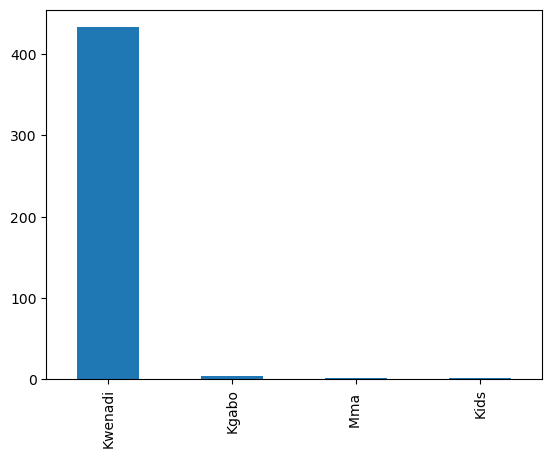

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
df['Profile Name'].value_counts().plot(kind='bar')
plt.show()

#### 2.Which Profile watched the most (time)?

In [10]:
df['Duration'].sum()

Timedelta('7 days 18:35:34')

In [11]:
df.sort_values('Start Time')

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
437,Kwenadi,2022-05-07 16:52:38+00:00,0 days 00:00:11,Autoplayed: user action: None;,Teaser: The Takedown,TEASER_TRAILER,Netflix Windows App - Cadmium Windows Mobile,00:00:11,Not latest view,ZA (South Africa)
436,Kwenadi,2022-05-07 16:55:26+00:00,0 days 01:08:43,NaN,Dave Chappelle: The Closer,NaN,Netflix Windows App - Cadmium Windows Mobile,01:10:08,Not latest view,ZA (South Africa)
435,Kwenadi,2022-05-07 18:05:10+00:00,0 days 01:03:54,NaN,Dave Chappelle: Collection: The Age of Spin: D...,NaN,Netflix Windows App - Cadmium Windows Mobile,01:05:24,Not latest view,ZA (South Africa)
434,Kwenadi,2022-05-07 19:11:16+00:00,0 days 01:04:57,NaN,Dave Chappelle: Collection: Deep in the Heart ...,NaN,Netflix Windows App - Cadmium Windows Mobile,01:04:57,01:04:57,ZA (South Africa)
433,Kwenadi,2022-05-07 20:22:46+00:00,0 days 01:25:42,NaN,The Babysitter,NaN,Netflix Windows App - Cadmium Windows Mobile,01:25:43,01:25:43,ZA (South Africa)
...,...,...,...,...,...,...,...,...,...,...
9,Kwenadi,2023-04-03 18:27:59+00:00,0 days 00:46:30,NaN,Breaking Bad: Season 4: Bug (Episode 9),NaN,Android DefaultWidevineL3Phone Android Phone,00:46:32,00:46:32,ZA (South Africa)
8,Kwenadi,2023-04-03 19:14:31+00:00,0 days 00:46:32,NaN,Breaking Bad: Season 4: Salud (Episode 10),NaN,Android DefaultWidevineL3Phone Android Phone,00:46:32,00:46:32,ZA (South Africa)
7,Kwenadi,2023-04-03 20:01:04+00:00,0 days 00:01:59,NaN,Breaking Bad: Season 4: Crawl Space (Episode 11),NaN,Android DefaultWidevineL3Phone Android Phone,00:02:02,00:02:02,ZA (South Africa)
6,Kwenadi,2023-04-05 14:47:17+00:00,0 days 00:00:05,NaN,Trailer: Dave Chappelle: The Closer,TRAILER,Android DefaultWidevineL3Phone Android Phone,00:00:00,00:00:00,ZA (South Africa)


#### Summarizing the viewing duration for each profile

In [12]:
df.loc[df['Profile Name']=='Kwenadi','Duration'].sum()

Timedelta('7 days 18:04:07')

In [13]:
df.loc[df['Profile Name']=='Kgabo','Duration'].sum()

Timedelta('0 days 00:02:14')

In [14]:
df.loc[df['Profile Name']=='Mma','Duration'].sum()

Timedelta('0 days 00:00:00')

In [15]:
df.loc[df['Profile Name']=='Kids','Duration'].sum()

Timedelta('0 days 00:00:16')

In [16]:
df.loc[df['Profile Name']=='Kwenadi','Duration'].astype('timedelta64[s]').sum()

669847.0

#### create a helper dict viewTime to store the overall view time per Profile in seconds

In [17]:
viewTime = {}
viewTime.update({"Kwenadi": df.loc[df['Profile Name']=='Kwenadi','Duration'].astype('timedelta64[s]').sum()})
viewTime.update({"Kgabo": df.loc[df['Profile Name']=='Kgabo','Duration'].astype('timedelta64[s]').sum()})
viewTime.update({"Kids": df.loc[df['Profile Name']=='Kids','Duration'].astype('timedelta64[s]').sum()})
viewTime.update({"Mma": df.loc[df['Profile Name']=='Mma','Duration'].astype('timedelta64[s]').sum()})
viewTime

{'Kwenadi': 669847.0, 'Kgabo': 134.0, 'Kids': 16.0, 'Mma': 0.0}

##### Plot it and have a look at the chart

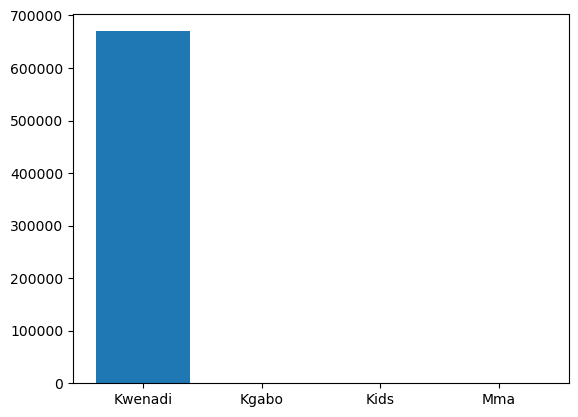

In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.bar(*zip(*viewTime.items()))
plt.show()

##### 3. What is the average watching time (per Profile)?

In [19]:
df['Profile Name'].value_counts()

Kwenadi    433
Kgabo        4
Mma          2
Kids         1
Name: Profile Name, dtype: int64

In [20]:
df.loc[df['Profile Name']=='Kwenadi','Duration'].sum()/433

Timedelta('0 days 00:25:46.990762124')

In [21]:
df.loc[df['Profile Name']=='Kids','Duration'].sum()/4

Timedelta('0 days 00:00:04')

In [22]:
df.loc[df['Profile Name']=='Kgabo','Duration'].sum()/2

Timedelta('0 days 00:01:07')

In [23]:
df.loc[df['Profile Name']=='Mma','Duration'].sum()/1

Timedelta('0 days 00:00:00')

##### Let's have a look at the values of column ‘Supplemental Video Type’

In [24]:
df['Supplemental Video Type'].value_counts()

HOOK              34
TRAILER           12
TEASER_TRAILER     8
CINEMAGRAPH        2
Name: Supplemental Video Type, dtype: int64

##### It seems we have overall 56 short interactions, that we want to filter out. The remaining 384 of the overall 440 rows are empty (NaN) and represent actual watched series & movies. So let’s only keep the rows with NaN in Supplement Video Type.

In [25]:
df.loc[df['Supplemental Video Type'].isnull()]

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kgabo,2023-01-08 19:04:16+00:00,0 days 00:01:47,NaN,Norbit,NaN,Netflix Windows App - Cadmium Windows Mobile,00:01:47,00:01:47,ZA (South Africa)
4,Kids,2023-03-17 05:06:07+00:00,0 days 00:00:16,NaN,CoComelon: Season 7: It's Cody Time (Episode 1),NaN,DefaultWidevineAndroidPhone,00:00:15,00:00:15,ZA (South Africa)
5,Kwenadi,2023-04-05 14:47:32+00:00,0 days 00:45:46,NaN,Dave Chappelle: The Closer,NaN,Android DefaultWidevineL3Phone Android Phone,00:56:56,00:56:56,ZA (South Africa)
7,Kwenadi,2023-04-03 20:01:04+00:00,0 days 00:01:59,NaN,Breaking Bad: Season 4: Crawl Space (Episode 11),NaN,Android DefaultWidevineL3Phone Android Phone,00:02:02,00:02:02,ZA (South Africa)
8,Kwenadi,2023-04-03 19:14:31+00:00,0 days 00:46:32,NaN,Breaking Bad: Season 4: Salud (Episode 10),NaN,Android DefaultWidevineL3Phone Android Phone,00:46:32,00:46:32,ZA (South Africa)
...,...,...,...,...,...,...,...,...,...,...
434,Kwenadi,2022-05-07 19:11:16+00:00,0 days 01:04:57,NaN,Dave Chappelle: Collection: Deep in the Heart ...,NaN,Netflix Windows App - Cadmium Windows Mobile,01:04:57,01:04:57,ZA (South Africa)
435,Kwenadi,2022-05-07 18:05:10+00:00,0 days 01:03:54,NaN,Dave Chappelle: Collection: The Age of Spin: D...,NaN,Netflix Windows App - Cadmium Windows Mobile,01:05:24,Not latest view,ZA (South Africa)
436,Kwenadi,2022-05-07 16:55:26+00:00,0 days 01:08:43,NaN,Dave Chappelle: The Closer,NaN,Netflix Windows App - Cadmium Windows Mobile,01:10:08,Not latest view,ZA (South Africa)
438,Mma,2023-01-18 21:58:13+00:00,0 days 00:27:41,NaN,Kings of Jo'Burg: Season 1: Vader (Father) (Ep...,NaN,DefaultWidevineAndroidPhone,00:27:56,00:27:56,ZA (South Africa)


##### And check the numbers again. First, we take a look at the value counts again…

In [26]:
df['Profile Name'].value_counts()

Kwenadi    433
Kgabo        4
Mma          2
Kids         1
Name: Profile Name, dtype: int64

In [27]:
df.loc[df['Profile Name']=='Kwenadi','Duration'].sum()/433

Timedelta('0 days 00:25:46.990762124')

In [28]:
df.loc[df['Profile Name']=='Kids','Duration'].sum()/1

Timedelta('0 days 00:00:16')

In [29]:
df.loc[df['Profile Name']=='Kgabo','Duration'].sum()/4

Timedelta('0 days 00:00:33.500000')

In [30]:
df.loc[df['Profile Name']=='Mma','Duration'].sum()/2

Timedelta('0 days 00:00:00')

##### 4.What devices are used by which Profile? And which device is used the most?

In [32]:
df['Device Type'].value_counts()

Android DefaultWidevineL3Phone Android Phone    244
Netflix Windows App - Cadmium Windows Mobile    169
Chrome PC (Cadmium)                              24
DefaultWidevineAndroidPhone                       3
Name: Device Type, dtype: int64

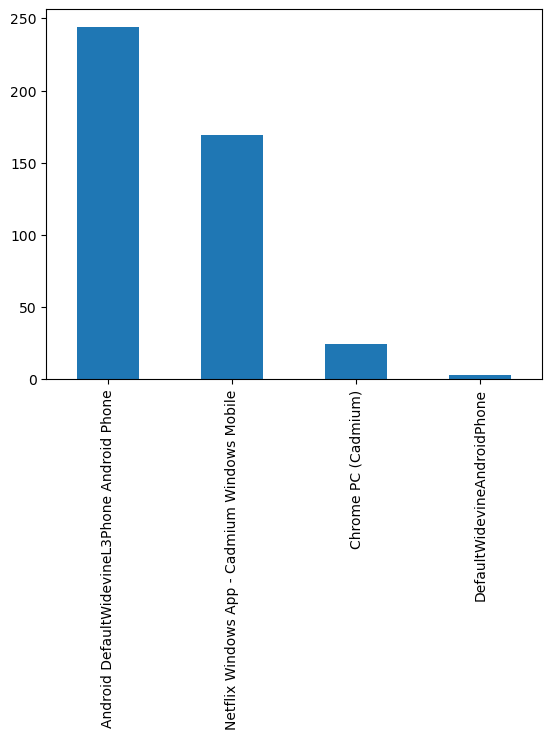

In [33]:
df['Device Type'].value_counts().plot(kind='bar')
plt.show()

##### I want to know more about my own devices, so let us filter them based on Profile ‘Kwenadi’

In [31]:
df1=df.loc[df['Profile Name'] == 'Kwenadi']

In [33]:
df1['Device Type'].value_counts()

Android DefaultWidevineL3Phone Android Phone    244
Netflix Windows App - Cadmium Windows Mobile    165
Chrome PC (Cadmium)                              24
Name: Device Type, dtype: int64

##### I use myphone most to watch netflix

##### Alright, time for the last chart of the day to view my devices

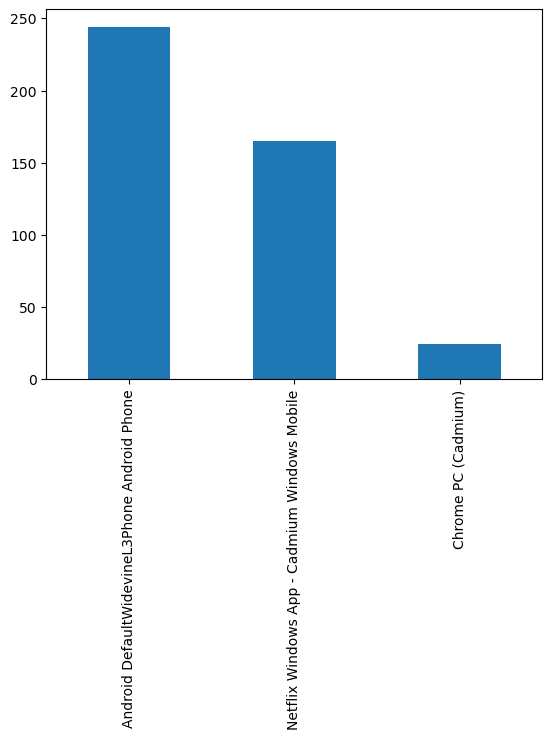

In [34]:
df1['Device Type'].value_counts().plot(kind='bar')
plt.show()

##### What was my most popular/watched title?

In [39]:
df['Title'].unique()

array(['Norbit', 'Season 1 Genre Specific Moment Clip: Wednesday',
       'Season 2 Genre Specific Moment Clip: Ginny & Georgia',
       "CoComelon: Season 7: It's Cody Time (Episode 1)",
       'Dave Chappelle: The Closer',
       'Trailer: Dave Chappelle: The Closer',
       'Breaking Bad: Season 4: Crawl Space (Episode 11)',
       'Breaking Bad: Season 4: Salud (Episode 10)',
       'Breaking Bad: Season 4: Bug (Episode 9)',
       'Breaking Bad: Season 4: Hermanos (Episode 8)',
       'Breaking Bad: Season 4: Problem Dog (Episode 7)',
       'Breaking Bad: Season 4: Cornered (Episode 6)',
       'Breaking Bad: Season 4: Shotgun (Episode 5)',
       'Breaking Bad: Season 4: Bullet Points (Episode 4)',
       'Breaking Bad: Season 4: Open House (Episode 3)',
       'Breaking Bad: Season 4: Thirty-Eight Snub (Episode 2)',
       'Breaking Bad: Season 4: Box Cutter (Episode 1)',
       'Breaking Bad: Season 5: Gliding Over All (Episode 8)',
       'Breaking Bad: Season 5: Say My Name 

In [41]:
df['Title'].value_counts()

The Pale Blue Eye                                                                                          7
Season 1 Genre Specific Moment Clip: Wednesday                                                             6
Dave Chappelle: Collection: The Age of Spin: Dave Chappelle Live at The Hollywood Palladium (Episode 1)    6
Guillermo del Toro's Cabinet of Curiosities: Season 1: Lot 36 (Episode 1)                                  5
Breaking Bad: Season 4: Thirty-Eight Snub (Episode 2)                                                      5
                                                                                                          ..
Stranger Things: Stranger Things 2: Chapter Seven: The Lost Sister (Episode 7)                             1
Cinemagraph: Hextech Mayhem: A League of Legends Story                                                     1
Stranger Things: Stranger Things 2: Chapter Five: Dig Dug (Episode 5)                                      1
Breaking Bad: Seaso